In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split






Load the data from csv into pandas dataframe

In [2]:
iris_data = pd.read_csv('Iris.csv').drop(columns='Id', axis=1)
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [3]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])


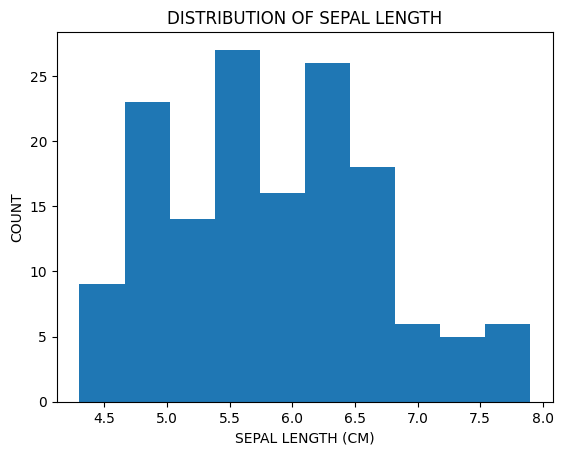

In [6]:
#simple analysis
sepal_length = iris_data['SepalLengthCm']
#creating an histogram
plt.hist(sepal_length)
plt.title("DISTRIBUTION OF SEPAL LENGTH")
plt.xlabel("SEPAL LENGTH (CM)")
plt.ylabel("COUNT")
plt.show()

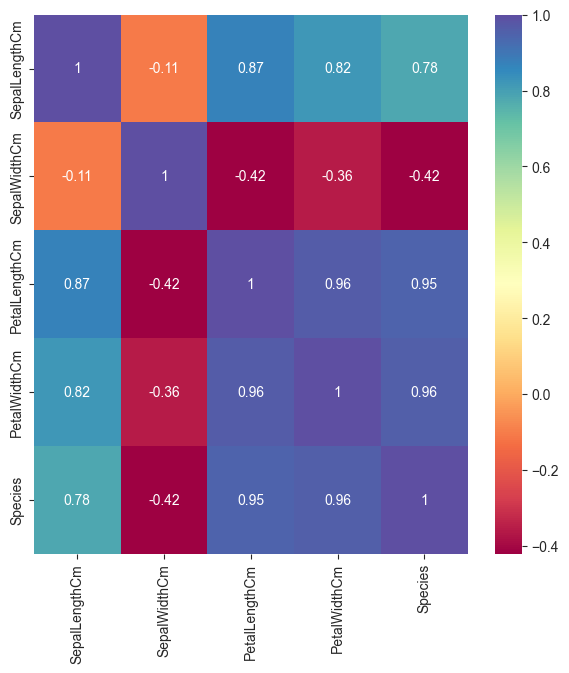

In [7]:
corr = iris_data.corr()

#creating a heat map
sns.set_style("ticks")

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap= "Spectral")
plt.show()

In [8]:
#separating data into feature and labels
x = iris_data.drop(columns='Species', axis=1)
y = iris_data['Species']


In [9]:
#data standardization
scaler=StandardScaler()
standard_data=scaler.fit_transform(x)
X=standard_data
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [10]:
#splitting data

X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [11]:
#training the model
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [12]:
#accuracy score
X_train_prediction=classifier.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction, Y_train)
training_accuracy

0.9833333333333333

In [13]:
X_test_prediction=classifier.predict(X_test)
test_accuracy=accuracy_score(X_test_prediction, Y_test)
print("The test accuracy of the data is:", test_accuracy)

The test accuracy of the data is: 0.9666666666666667


In [14]:
#saving the trained model

import pickle
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [15]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [16]:

#making a predictive system
input_data = (5.1,3.5,1.4,0.2)
input_array=np.asarray(input_data)
#reshape
input_array_reshape = input_array.reshape(1,-1)
prediction= loaded_model.predict(input_array_reshape)
if (prediction[0] == 0):
    print('The flower is iris setosa')
elif(prediction[0] == 0) :
    print('The flower is iris versicolor')
else:
    print('the flower is iris virginica')
    


the flower is iris virginica
